In [ ]:
#Download dataset
!wget -O rockpaperscissors.zip https://ucb1cc466112cb0d9937c9eee81a.dl.dropboxusercontent.com/cd/0/get/BBv0jQYLCua6hTQgkE4_2EkavReqeqI7nApRjfhKVjMZ5e_-S9chiXo5glV3hd5pUkNnx1wyjw5b815NLMttdqzUjMwpZ0wlU4dHlF1MKom_jQS8UBzu41zxM7a18Fxapj4/file

--2020-10-22 10:41:29--  https://ucb1cc466112cb0d9937c9eee81a.dl.dropboxusercontent.com/cd/0/get/BBv0jQYLCua6hTQgkE4_2EkavReqeqI7nApRjfhKVjMZ5e_-S9chiXo5glV3hd5pUkNnx1wyjw5b815NLMttdqzUjMwpZ0wlU4dHlF1MKom_jQS8UBzu41zxM7a18Fxapj4/file
Resolving ucb1cc466112cb0d9937c9eee81a.dl.dropboxusercontent.com (ucb1cc466112cb0d9937c9eee81a.dl.dropboxusercontent.com)... 162.125.82.15, 2620:100:6032:15::a27d:520f
Connecting to ucb1cc466112cb0d9937c9eee81a.dl.dropboxusercontent.com (ucb1cc466112cb0d9937c9eee81a.dl.dropboxusercontent.com)|162.125.82.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/binary]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  17.7MB/s    in 18s     

2020-10-22 10:41:48 (16.7 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#unzip dataset
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6Cay.png  
  inflating: rockpaperscissors/scissors/2DEYFsJ27UgVq

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import shutil
import os
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
#dataset directory
data_dir = '/content/rockpaperscissors'

#create train directory
train_dir = os.path.join(data_dir, 'train')
if not os.path.exists(train_dir):
  os.mkdir(train_dir)

#create validation directory
validation_dir = os.path.join(data_dir, 'validation')
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)

#directory masing" dataset
paper_dir = os.path.join(data_dir, 'paper')
rock_dir = os.path.join(data_dir, 'rock')
scissors_dir = os.path.join(data_dir, 'scissors')


In [ ]:
#create train data directory inside train directory
train_paper_dir = os.path.join(train_dir, 'paper')
shutil.rmtree(train_paper_dir, ignore_errors=True) #remove folder to reset data
if not os.path.exists(train_paper_dir):
  os.mkdir(train_paper_dir)

train_rock_dir = os.path.join(train_dir, 'rock')
shutil.rmtree(train_rock_dir, ignore_errors=True)
if not os.path.exists(train_rock_dir):
  os.mkdir(train_rock_dir)

train_scissors_dir = os.path.join(train_dir, 'scissors')
shutil.rmtree(train_scissors_dir, ignore_errors=True)
if not os.path.exists(train_scissors_dir):
  os.mkdir(train_scissors_dir)

#create validation data directory inside validation direcotry
validation_paper_dir = os.path.join(validation_dir, 'paper')
shutil.rmtree(validation_paper_dir, ignore_errors=True)
if not os.path.exists(validation_paper_dir):
  os.mkdir(validation_paper_dir)

validation_rock_dir = os.path.join(validation_dir, 'rock')
shutil.rmtree(validation_rock_dir, ignore_errors=True)
if not os.path.exists(validation_rock_dir):
  os.mkdir(validation_rock_dir)

validation_scissors_dir = os.path.join(validation_dir, 'scissors')
shutil.rmtree(validation_scissors_dir, ignore_errors=True)
if not os.path.exists(validation_scissors_dir):
  os.mkdir(validation_scissors_dir)

In [ ]:
#pisah data train dan validation
list_paper_data = os.listdir(paper_dir) #isi dari directory paper
train_paper_data, val_paper_data = train_test_split(list_paper_data, test_size = 0.4)
#count = 0
for i in train_paper_data: #copy data train ke train directory -> paper
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper_dir,i)) #shutil.copy(source,direction)
  #count += 1
for i in val_paper_data: #copy data validation ke validation directory -> paper
  shutil.copy(os.path.join(paper_dir,i), os.path.join(validation_paper_dir,i))
  
list_rock_data = os.listdir(rock_dir) #isi dari directory rock
train_rock_data, val_rock_data = train_test_split(list_rock_data, test_size = 0.4)
for i in train_rock_data:
  shutil.copy(os.path.join(rock_dir,i), os.path.join(train_rock_dir,i))
for i in val_rock_data:
  shutil.copy(os.path.join(rock_dir,i), os.path.join(validation_rock_dir,i))

list_scissors_data = os.listdir(scissors_dir) #isi dari directory scissors
train_scissors_data, val_scissors_data = train_test_split(list_scissors_data, test_size = 0.4)
for i in train_scissors_data:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors_dir,i))
for i in val_scissors_data:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(validation_scissors_dir,i))

#print(count)
print('Train Data (60% dari 2188):', len(train_paper_data) + len(train_rock_data) + len(train_scissors_data))
print('Validation Data (40% dari 2188):', len(val_paper_data) + len(val_rock_data) + len(val_scissors_data))

Train Data (60% dari 2188): 1312
Validation Data (40% dari 2188): 876


In [ ]:
# create data generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    horizontal_flip = True,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    horizontal_flip = True,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest'
    )

In [ ]:
btch_size = 32
img_height = 150
img_width = 150
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(img_height,img_width),
    batch_size = btch_size,
    class_mode = 'categorical' 
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (img_height,img_width),
    batch_size = btch_size,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# create sequential model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (img_height,img_width,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#train the data
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 10, #iterasi
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2
    )

Epoch 1/10
25/25 - 43s - loss: 0.2424 - accuracy: 0.9100 - val_loss: 0.2411 - val_accuracy: 0.8875
Epoch 2/10
25/25 - 45s - loss: 0.1787 - accuracy: 0.9312 - val_loss: 0.2666 - val_accuracy: 0.9312
Epoch 3/10
25/25 - 44s - loss: 0.1219 - accuracy: 0.9550 - val_loss: 0.1615 - val_accuracy: 0.9500
Epoch 4/10
25/25 - 44s - loss: 0.1379 - accuracy: 0.9525 - val_loss: 0.1107 - val_accuracy: 0.9750
Epoch 5/10
25/25 - 47s - loss: 0.0577 - accuracy: 0.9825 - val_loss: 0.1062 - val_accuracy: 0.9750
Epoch 6/10
25/25 - 44s - loss: 0.0672 - accuracy: 0.9800 - val_loss: 0.2113 - val_accuracy: 0.9312
Epoch 7/10
25/25 - 44s - loss: 0.0820 - accuracy: 0.9775 - val_loss: 0.0651 - val_accuracy: 0.9750
Epoch 8/10
25/25 - 44s - loss: 0.0534 - accuracy: 0.9787 - val_loss: 0.0941 - val_accuracy: 0.9688
Epoch 9/10
25/25 - 45s - loss: 0.1194 - accuracy: 0.9600 - val_loss: 0.1284 - val_accuracy: 0.9375
Epoch 10/10
25/25 - 44s - loss: 0.0484 - accuracy: 0.9825 - val_loss: 0.0833 - val_accuracy: 0.9750


Saving 3kVoftgTNdDcvPPY.png to 3kVoftgTNdDcvPPY.png
scissors


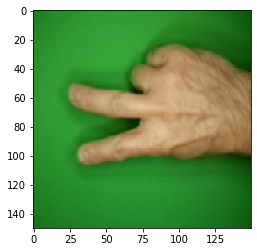

In [ ]:
%matplotlib inline

#to upload image
uploaded = files.upload()
for i in uploaded.keys():

  img = image.load_img(i, target_size =(img_height,img_width))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  klasifikasi = model.predict(images, batch_size=32)
  #print(klasifikasi[0,0])
  #print(klasifikasi[0,1])
  #print(klasifikasi)

  if klasifikasi[0,0] == 1:
    print('paper')
  elif klasifikasi[0,1] == 1:
    print('rock')
  else:
    print('scissors')